# Analysis 4 : The distribution of the scoring times

In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import operator
from ast import literal_eval
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%pylab inline
import httplib

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data = pd.read_csv('./data/2002-2012-EPL.csv')

In [4]:
# exclude the own goals.

data_refined = data[~data.home_scorers.str.contains(',og', na=False)]
data_refined = data_refined[~data_refined.away_scorers.str.contains(',og', na=False)]
data_refined = data_refined.reset_index(drop = True)

data_splitted_home = data_refined.home_scorers.str.split(',', return_type='frame')#.astype(int)
data_splitted_away = data_refined.away_scorers.str.split(',', return_type='frame')#.astype(int)

C:\Users\milanlouei.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: the return_type='frame' keyword is deprecated, use expand=True instead
C:\Users\milanlouei.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: the return_type='frame' keyword is deprecated, use expand=True instead


In [5]:
goal_min_data = pd.DataFrame(columns = ['home_team','home_score','home_score_min','away_team','away_score','away_score_min'], 
                          index = np.arange(0,len(data_refined),1))

goal_min_data.home_team = data_refined.home_team
goal_min_data.away_team = data_refined.away_team
goal_min_data.home_score = data_refined.home_score
goal_min_data.away_score = data_refined.away_score

for i in range(len(goal_min_data)):

    goal_min_data.home_score_min[i] = []
    goal_min_data.away_score_min[i] = []
    
    for j in range(int(goal_min_data.home_score[i])):
        goal_min_data.home_score_min[i].append(data_splitted_home[2*j+1][i])
        
    for j in range(int(goal_min_data.away_score[i])):
        goal_min_data.away_score_min[i].append(data_splitted_away[2*j+1][i])
    
goal_min_data.to_csv('./data/goal_min_data.csv')

C:\Users\milanlouei.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\milanlouei.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
goal_min_data = pd.read_csv('./data/goal_min_data.csv')
goal_min_data = goal_min_data.drop(['Unnamed: 0'], 1)
goal_min_data.head()

,home_team,home_score,home_score_min,away_team,away_score,away_score_min
0,Blackburn Rovers,3,"['53', '66', '81']",Fulham,0,[]
1,Leicester City,2,"['60', '71']",Tottenham Hotspur,1,['54']
2,Liverpool,5,"['13', '35', '46', '57', '88']",Ipswich Town,0,[]
3,West Ham United,2,"['45', '89']",Bolton Wanderers,1,['67']
4,Sunderland,1,['17'],Derby County,1,['68']


In [4]:
# find the frequency distribution of scoring time.

goal_min = []

for i in range(len(goal_min_data)):

    time_home = literal_eval(goal_min_data.home_score_min[i])
    time_away = literal_eval(goal_min_data.away_score_min[i])
    
    for j in range(len(time_home)):
        if time_home[j] != None:
            goal_min.append(int(time_home[j]))
        else:
            continue

    for j in range(len(time_away)):
        if time_away[j] != None:
            goal_min.append(int(time_away[j]))
        else:
            continue


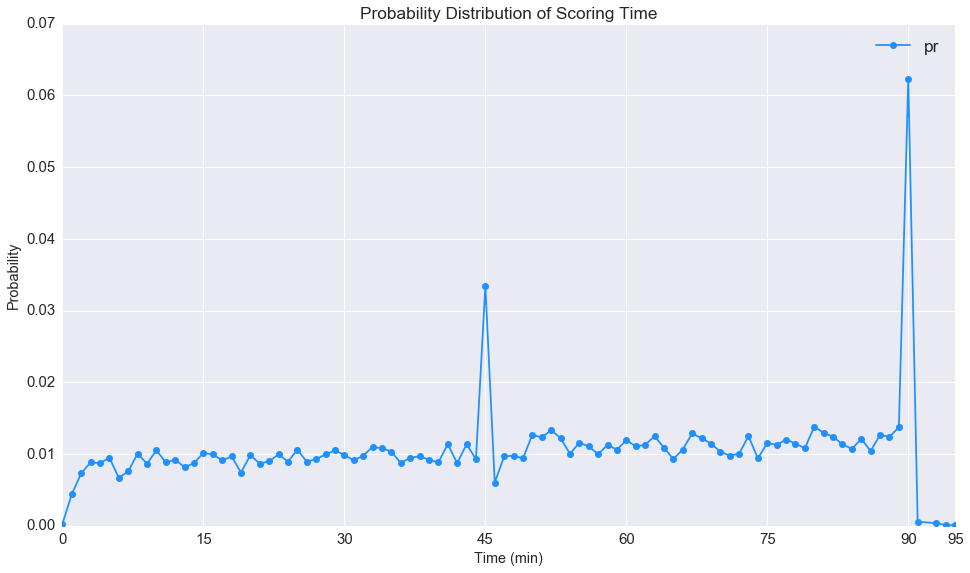

In [14]:
goal_min_counter = Counter(goal_min)
goal_min_dict = dict(goal_min_counter)

s = sum(goal_min_dict.values())
goal_min_dict_prob = dict((x, float(y)/s) for x, y in goal_min_dict.items())

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0,15,30,45,60,75,90,95])


plt.plot(goal_min_dict_prob.keys(),goal_min_dict_prob.values(),color='dodgerblue', linestyle='-',
         marker='o', label = 'pr')


plt.xticks(size = 15)
plt.yticks(size = 15)

ax.set_title('Probability Distribution of Scoring Time',fontsize='xx-large')
ax.set_xlabel('Time (min)',fontsize='x-large')
ax.set_ylabel('Probability',fontsize='x-large')
ax.legend(loc='best',fontsize='xx-large')
ax.grid(True)
savefig('Probability Distribution of Scoring Time.png')

In [16]:
home_goal_min = []
away_goal_min = []

for i in range(len(goal_min_data)):

    time_home = literal_eval(goal_min_data.home_score_min[i])
    time_away = literal_eval(goal_min_data.away_score_min[i])

    for j in range(len(time_home)):
        if time_home[j] != None:
            home_goal_min.append(int(time_home[j]))
        else:
            continue

    for j in range(len(time_away)):
        if time_away[j] != None:
            away_goal_min.append(int(time_away[j]))
        else:
            continue


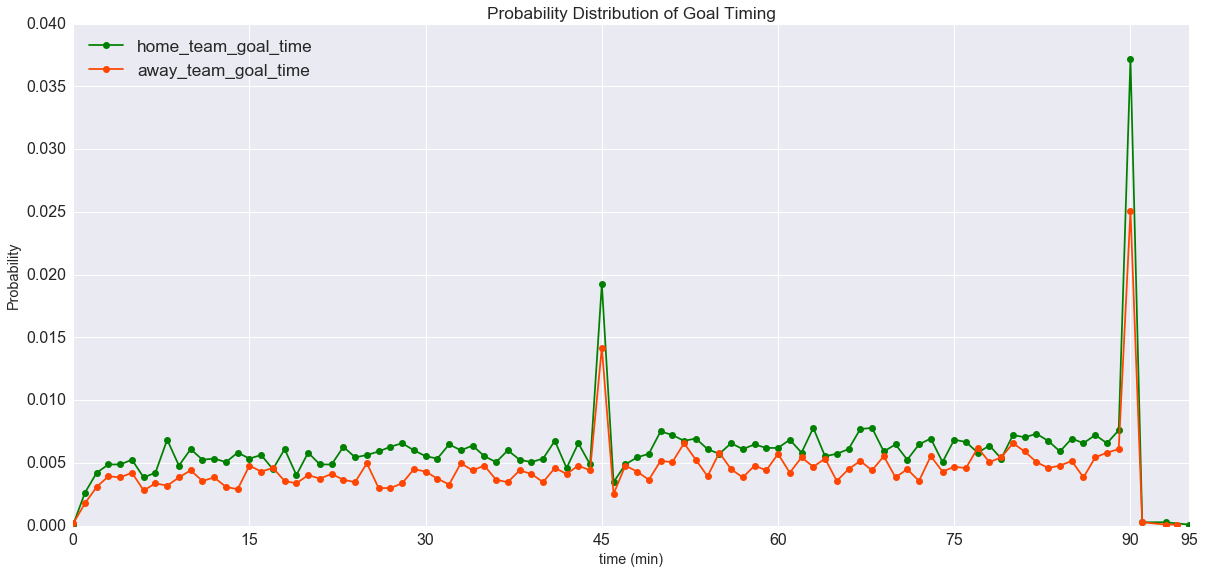

In [22]:
home_goal_min_counter = Counter(home_goal_min)
home_goal_min_dict = dict(home_goal_min_counter)


away_goal_min_counter = Counter(away_goal_min)
away_goal_min_dict = dict(away_goal_min_counter)

ss = sum(goal_min_dict.values())

home_goal_min_dict_prob = dict((x, float(y)/ss) for x, y in home_goal_min_dict.items())


away_goal_min_dict_prob = dict((x, float(y)/ss) for x, y in away_goal_min_dict.items())


fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0,15,30,45,60,75,90,95])

plt.plot(home_goal_min_dict_prob.keys(),home_goal_min_dict_prob.values(),color='green', label = 'home_team_goal_time',marker='o')

plt.plot(away_goal_min_dict_prob.keys(),away_goal_min_dict_prob.values(),color='orangered',label = 'away_team_goal_time',marker='o')
plt.xticks(size = 16)
plt.yticks(size=16)
ax.set_title('Probability Distribution of Goal Timing',fontsize='xx-large')
ax.set_xlabel('time (min)',fontsize='x-large')
ax.set_ylabel('Probability',fontsize='x-large')
ax.legend(loc='best',fontsize = 'xx-large')
savefig('Probability Distribution of Goal Timing (Home-Away).png')

In [23]:
# Define a function to generate the same plot as above for each team.

def team_scoring_time_dist(team = 'Manchester United', data = goal_min_data):
    
    man_utd_home = goal_min_data[goal_min_data.home_team == team]
    man_utd_away = goal_min_data[goal_min_data.away_team == team]
    man_utd_home = man_utd_home.reset_index(drop= True)
    man_utd_away = man_utd_away.reset_index(drop = True)
    man_utd = pd.concat([man_utd_home, man_utd_home],ignore_index=True)
    
    
    
    man_utd_goal_min = []

    for i in range(len(man_utd_home)):

        time_home = literal_eval(man_utd_home.home_score_min[i])

        for j in range(len(time_home)):
            if time_home[j] != None:
                man_utd_goal_min.append(int(time_home[j]))
            else:
                continue

    for i in range(len(man_utd_away)):

        time_away = literal_eval(man_utd_away.home_score_min[i])

        for j in range(len(time_away)):
            if time_away[j] != None:
                man_utd_goal_min.append(int(time_away[j]))
            else:
                continue

                
                
    man_utd_goal_min_counter = Counter(man_utd_goal_min)
    man_utd_goal_min_dict = dict(man_utd_goal_min_counter)

    
    man_utd_home_goal_min = []
    man_utd_away_goal_min = []

    for i in range(len(man_utd_home)):

        time_home = literal_eval(man_utd_home.home_score_min[i])

        for j in range(len(time_home)):
            if time_home[j] != None:
                man_utd_home_goal_min.append(int(time_home[j]))
            else:
                continue

    for i in range(len(man_utd_away)):

        time_away = literal_eval(man_utd_away.home_score_min[i])

        for j in range(len(time_away)):
            if time_away[j] != None:
                man_utd_away_goal_min.append(int(time_away[j]))
            else:
                continue

    ss = sum(man_utd_goal_min_dict.values())
    man_utd_home_goal_min_counter = Counter(man_utd_home_goal_min)
    man_utd_home_goal_min_dict = dict(man_utd_home_goal_min_counter)

    man_utd_away_goal_min_counter = Counter(man_utd_away_goal_min)
    man_utd_away_goal_min_dict = dict(man_utd_away_goal_min_counter)

    man_utd_home_goal_min_dict_prob = dict((x, float(y)/ss) for x, y in man_utd_home_goal_min_dict.items())

    man_utd_away_goal_min_dict_prob = dict((x, float(y)/ss) for x, y in man_utd_away_goal_min_dict.items())


    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    ticks = ax.set_xticks([0,15,30,45,60,75,90,95])

    plt.plot(man_utd_home_goal_min_dict_prob.keys(),man_utd_home_goal_min_dict_prob.values(),
             color='turquoise',label = 'home_goal', linestyle='-', marker='o' )
    plt.plot(man_utd_away_goal_min_dict_prob.keys(),man_utd_away_goal_min_dict_prob.values(),
             color='orange',label = 'away_goal',linestyle='-',marker = 'o')# linestyle='dashed', marker='o', 

    ax.set_title('Probability Distribution of Scoring Time (Manchester United)',fontsize='xx-large')
    ax.set_xlabel('time (min)',fontsize='xx-large')
    ax.set_ylabel('Probability',fontsize='xx-large')
    ax.legend(loc='best',fontsize='xx-large')
    plt.xticks(size = 16)
    plt.yticks(size = 16)
    ax.grid(True)
    savefig('Probability Distribution of Scoring Time (Home - Away.png')


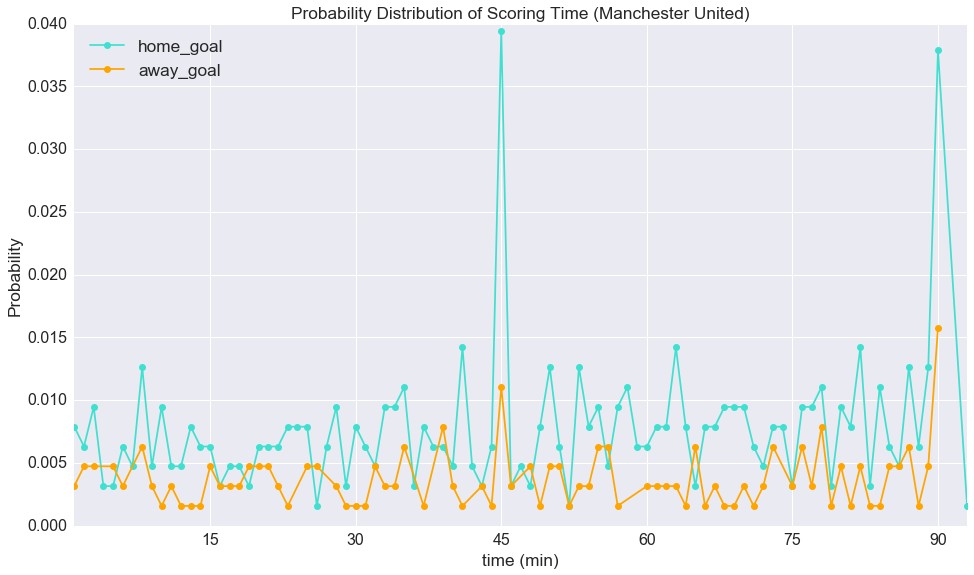

In [24]:
team_scoring_time_dist()

#  Time of winning goal


In [25]:
goal_win_home = goal_min_data[goal_min_data.home_score-goal_min_data.away_score==1]
goal_win_away = goal_min_data[goal_min_data.away_score-goal_min_data.home_score==1]

goal_win = pd.concat([goal_win_home, goal_win_away],ignore_index=True)

In [26]:
goal_win_min = []

for i in range(len(goal_win)):

    time_home = literal_eval(goal_win.home_score_min[i])
    time_away = literal_eval(goal_win.away_score_min[i])
    
    temp_home = []
    for j in range(len(time_home)):
        if time_home[j] != None:
            temp_home.append(int(time_home[j]))
        else:
            continue
    if temp_home:
        goal_win_min.append(max(temp_home))

    temp_away = []
    for j in range(len(time_away)):
        if time_away[j] != None:
            temp_away.append(int(time_away[j]))
        else:
            continue

    if temp_away:
        goal_win_min.append(max(temp_away))

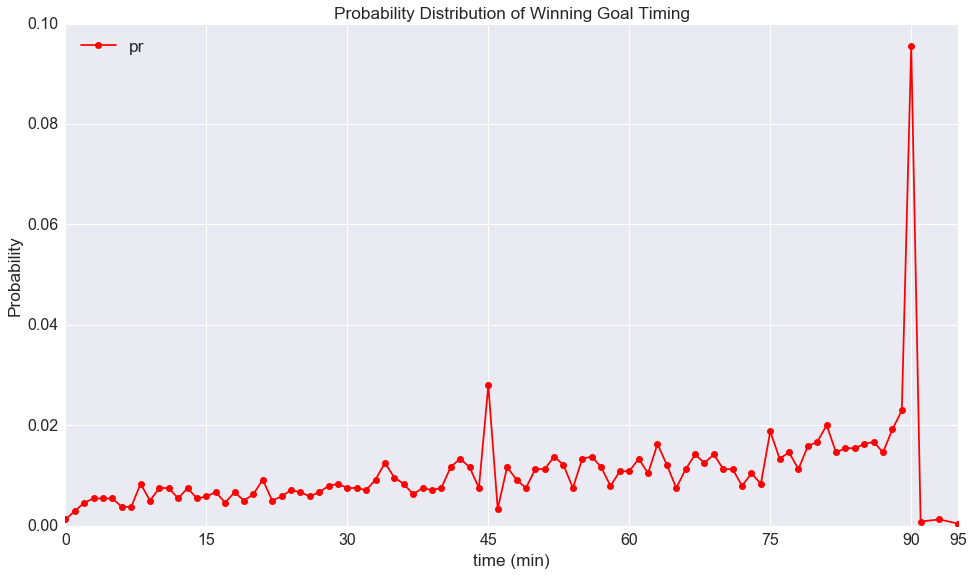

In [28]:
goal_win_min_counter = Counter(goal_win_min)
goal_win_min_dict = dict(goal_win_min_counter)

s = sum(goal_win_min_dict.values())
goal_win_min_dict_prob = dict((x, float(y)/s) for x, y in goal_win_min_dict.items())

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0,15,30,45,60,75,90,95])

plt.plot(goal_win_min_dict_prob.keys(),goal_win_min_dict_prob.values(),color='red', linestyle='-', marker='o', label = 'pr')

plt.xticks(size=16)
plt.yticks(size = 16)
ax.set_title('Probability Distribution of Winning Goal Timing',fontsize='xx-large')
ax.set_xlabel('time (min)',fontsize='xx-large')
ax.set_ylabel('Probability',fontsize='xx-large')
ax.legend(loc='best',fontsize='xx-large')
ax.grid(True)

savefig('Probability Distribution of Winning Goal Time.png')

In [29]:
home_goal_win_min = []
away_goal_win_min = []

for i in range(len(goal_win)):

    time_home = literal_eval(goal_win.home_score_min[i])
    time_away = literal_eval(goal_win.away_score_min[i])

    temp_home = []
    for j in range(len(time_home)):
        if time_home[j] != None:
            temp_home.append(int(time_home[j]))
        else:
            continue
    if temp_home:
        home_goal_win_min.append(max(temp_home))

    temp_away = []
    for j in range(len(time_away)):
        if time_away[j] != None:
            temp_away.append(int(time_away[j]))
        else:
            continue

    if temp_away:
        away_goal_win_min.append(max(temp_away))

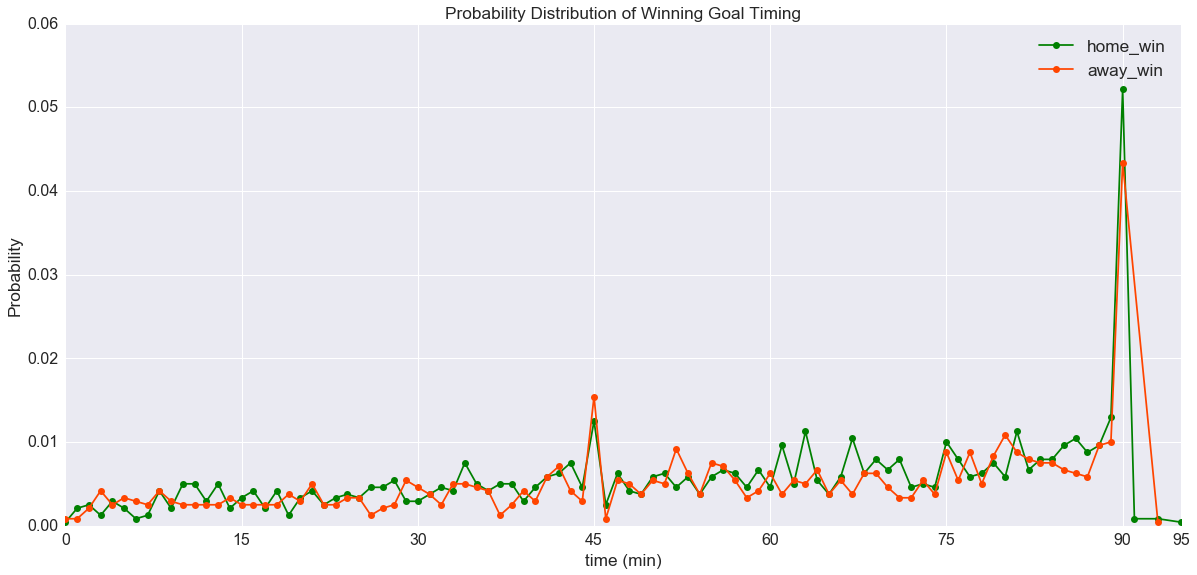

In [33]:
home_goal_win_min_counter = Counter(home_goal_win_min)
home_goal_win_min_dict = dict(home_goal_win_min_counter)

away_goal_win_min_counter = Counter(away_goal_win_min)
away_goal_win_min_dict = dict(away_goal_win_min_counter)

s = sum(goal_win_min_dict.values())


home_goal_win_min_dict_prob = dict((x, float(y)/s) for x, y in home_goal_win_min_dict.items())



away_goal_win_min_dict_prob = dict((x, float(y)/s) for x, y in away_goal_win_min_dict.items())
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1, 1, 1)
# ticks = ax.set_xticks(list(goal_min_dict.keys()))
ax.set_xticks([0,15,30,45,60,75,90,95])

plt.plot(home_goal_win_min_dict_prob.keys(),home_goal_win_min_dict_prob.values(),color='green', linestyle='-', marker='o', 
         label = 'home_win')

plt.plot(away_goal_win_min_dict_prob.keys(),away_goal_win_min_dict_prob.values(),color='orangered', linestyle='-', marker='o',
         label = 'away_win')
# plt.xticks(range(len(goal_min_dict)),list(goal_min_dict.keys()),rotation=45,ha='right')
ax.set_title('Probability Distribution of Winning Goal Timing',fontsize='xx-large')
ax.set_xlabel('time (min)',fontsize='xx-large')
ax.set_ylabel('Probability',fontsize='xx-large')
ax.legend(loc='best',fontsize='xx-large')
plt.xticks(size = 16)
plt.yticks(size=16)
savefig('Probability Distribution of Winning Goal Time (Home-Away).png')